# Project Business Statistics: E-news Express

### By Fallaye Diallo

#### Full code version

**Marks: 60**

## Define Problem Statement and Objectives

### Problem Statement: 
An online news portal aims to expand its business by acquiring new subscribers. Every visitor to the website takes certain actions based on their interest. The company plans to analyze these interests and wants to determine whether a new feature will be effective or not. Companies often analyze users' responses to two variants of a product to decide which of the two variants is more effective. This experimental technique is known as a/b testing that is used to determine whether a new feature attracts users based on a chosen metric.

Suppose you are hired as a Data Scientist in E-news Express. The design team of the company has created a new landing page. You have been assigned the task to decide whether the new landing page is more effective to gather new subscribers. Suppose you randomly selected 100 users and divided them equally into two groups. The old landing page is served to the first group (control group) and the new landing page is served to the second group (treatment group). Various data about the customers in both groups are collected in 'abtest.csv'. Perform the statistical analysis to answer the following questions using the collected data.

On this study I will conduct a/b testing to understand the data inferences, and recommend the necessary insights on the effectiveness of the new page on attracting users considering their different chosen metrics.

### Objectives: 
As a data scientist chosen to conduct this study. The mail goal is to do an a/b testing experiment for this I will be conducting statistical analysis of the business data that have been provided to best answer the questions and needs of the company. Throughout this study several main questions will be address such as: 
1.	Explore the dataset and extract insights using Exploratory Data Analysis.
2.	Do the users spend more time on the new landing page than the old landing page?
3.	Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?
4.	Does the converted status depend on the preferred language? 
5.	Is the mean time spent on the new page same for the different language users?


The Level of significance given for all tests in this study is 0.05



### Data Dictionary:

user_id - This represents the user ID of the person visiting the website.
group - This represents whether the user belongs to the first group (control) or the second group (treatment).
landing_page - This represents whether the landing page is new or old.
time_spent_on_the_page - This represents the time (in minutes) spent by the user on the landing page.
converted - This represents whether the user gets converted to a subscriber of the news portal or not.
language_preferred - This represents the language chosen by the user to view the landing page.


## Import all the necessary libraries

In [1]:
#Let's import all the necessary library 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Explore the dataset and extract insights using Exploratory Data Analysis. (10 Marks)

### Exploratory Data Analysis - Step by step approach

Typical Data exploration activity consists of the following steps:
1.	Importing Data
2.	Variable Identification
3.  Variable Transformation/Feature Creation
4.  Missing value detection
5.	Univariate Analysis
6.	Bivariate Analysis

### Reading the Data into a DataFrame

In [2]:
# Let's load the data and display the first 6 rows
# We set data as df to make it easier 
df = pd.read_csv('abtest.csv')
#view few rows of the dataframe
df.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
0,546592,control,old,3.48,no,Spanish
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
3,546567,control,old,3.02,no,French
4,546459,treatment,new,4.75,yes,Spanish


In [3]:
#Let's get the shape of the dataframe to know how many rows and columns are present
df.shape

(100, 6)

In [4]:
#Let's check if the data has any missing information
df.isnull().sum()

user_id                   0
group                     0
landing_page              0
time_spent_on_the_page    0
converted                 0
language_preferred        0
dtype: int64

#### Observation: 
The data has 100 rows and 6 columns, with no missing data.

In [5]:
#Let's check the data type of the columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   user_id                 100 non-null    int64  
 1   group                   100 non-null    object 
 2   landing_page            100 non-null    object 
 3   time_spent_on_the_page  100 non-null    float64
 4   converted               100 non-null    object 
 5   language_preferred      100 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 4.8+ KB


#### Observation:  
The data types present in the dataframe are interger, object, and float. We need to convert the object data type to category data in order to save space and make our data manipulation easier.

In [6]:
#Let's convert the object data type to category data type to minimize space use and facilitate data manipulation
df['group']= df['group'].astype('category')
df['landing_page']= df['landing_page'].astype('category')
df['converted'] = df['converted'].astype('category')
df['language_preferred'] = df['language_preferred'].astype('category')

In [7]:
#Now Lets check the data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   user_id                 100 non-null    int64   
 1   group                   100 non-null    category
 2   landing_page            100 non-null    category
 3   time_spent_on_the_page  100 non-null    float64 
 4   converted               100 non-null    category
 5   language_preferred      100 non-null    category
dtypes: category(4), float64(1), int64(1)
memory usage: 2.6 KB


#### Observation: 
Now the data type object has been converted to category data type.

In [8]:
#Let's get the descriptive statistical information of the Data to know different futures 
df.describe()

,user_id,time_spent_on_the_page
count,100.000000,100.000000
mean,546517.000000,5.377800
std,52.295779,2.378166
min,546443.000000,0.190000
25%,546467.750000,3.880000
50%,546492.500000,5.415000
75%,546567.250000,7.022500
max,546592.000000,10.710000


#### Observation: 
The mean time spent on the page is 5.377
The standard deviation is 2.378166

In [9]:
#Let's check the number of users in each group
df['group'].value_counts()

control      50
treatment    50
Name: group, dtype: int64

In [10]:
#Let's check how many users have landed on the new and old page
df['landing_page'].value_counts()

new    50
old    50
Name: landing_page, dtype: int64

In [11]:
#Let's check how many users have converted 
df['converted'].value_counts()

yes    54
no     46
Name: converted, dtype: int64

In [12]:
#Let's Check how many users are from the 3 different languages
df['language_preferred'].value_counts()

French     34
Spanish    34
English    32
Name: language_preferred, dtype: int64

#### Observation:
*There are 100 unique value user id

*There are 3 prefered languages: English, French, and Spanish.

*There are 2 unique groups control and treatment. There are 50 users in every group.

*There are 46 users that have not been converted and 54 users have been converted.

*There are 2 unique landing pages old and new.

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale. This make it easier to do the visualizations.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [14]:
# function to create labeled barplots, also necessary for good visual study


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data, x=feature, palette="Paired", order=data[feature].value_counts().index[:n].sort_values())

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(100 * p.get_height() / total)  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()      # height of the plot

        ax.annotate(label, (x, y), ha="center", va="center", size=12, xytext=(0, 5), textcoords="offset points")  # annotate the percentage

    plt.show()  # show the plot

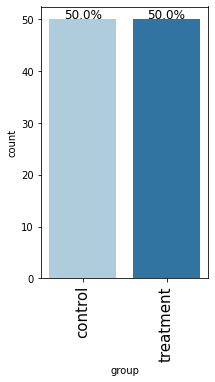

In [15]:
#Let's plot a Barplot for 'group'
labeled_barplot(df,'group',perc= True)

#### Observation:
The number uf users is equally split between the two sample groups (control, and treatment)

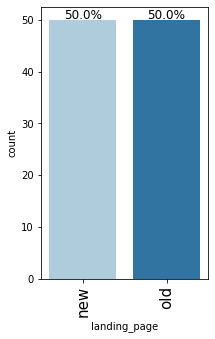

In [16]:
#Let's plot a Labeled barplot for 'Landing page'
labeled_barplot(df,'landing_page', perc= True)

#### Observation:
The numbers of people who visit the old and new pages are the same 50 each.

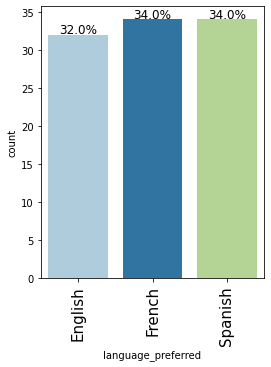

In [17]:
#Let's plot a Barplot for 'Language_preferred'
labeled_barplot(df,'language_preferred', perc= True)

#### Observation:
The languages preferred while visiting the site go as follow:

32% of the users preferred English

34% of the users preferred Spanish

34% of the users preferred French

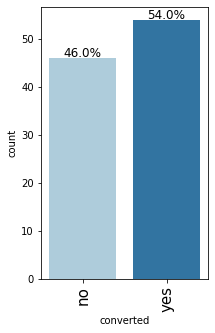

In [18]:
#Let's plot a Barplot for 'converted'
labeled_barplot(df,'converted', perc= True)

#### Observation:
From the 100 users 54% have converted to the new page and 46% have preferred now to.

### Bivariate Analysis

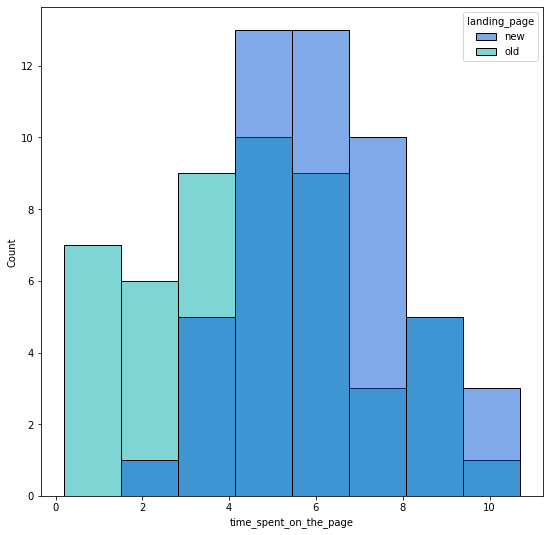

In [19]:
#Let's Analyse the relation between Landing page vs Time spent on the page
plt.figure(figsize=(9, 9))
sns.histplot(data=df, x='time_spent_on_the_page', hue= 'landing_page', palette="winter")
plt.show()

#### Observation: 
From this analysis we deduct that from the sampled population people on average spend more time on the new page compared to the old page. The graph also suggests that more people visit the new page than the old page.

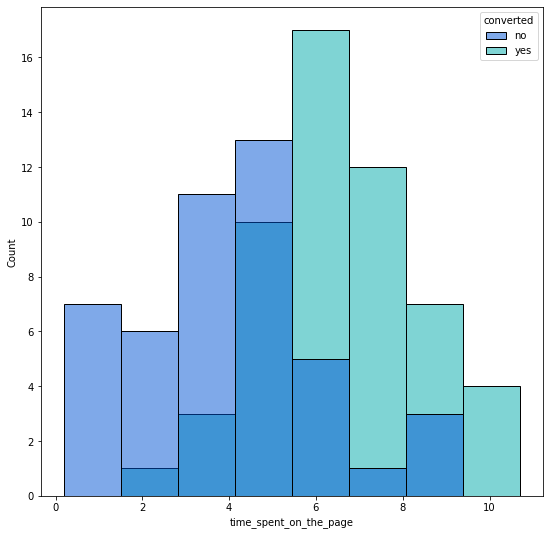

In [20]:
#Let's graph the relationship between conversion status and Time spent on the page
plt.figure(figsize=(9, 9))
sns.histplot(data=df, x='time_spent_on_the_page', hue= 'converted', palette="winter")
plt.show()

#### Observation: 
This graph tells us that people who have converted to the new page tends to spend more time on the page on average compared to the ones that have not converted.

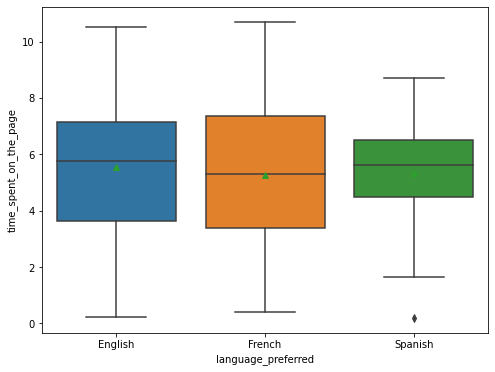

In [21]:
#Lets graph the relationship between Language preferred and Time spent on the page
plt.figure(figsize=(8,6))
sns.boxplot(x = 'language_preferred', y = 'time_spent_on_the_page', data = df, showmeans=True)
plt.show()

#### Observation: 
On Average English readers spend more time on the page compared to the other languages, people who have spanish as their preferred language have a slight same average time to the English language. People with French as preferred language have a slight lower average time than the other two.

## 2. Do the users spend more time on the new landing page than the existing landing page? (10 Marks)

### Perform Visual Analysis

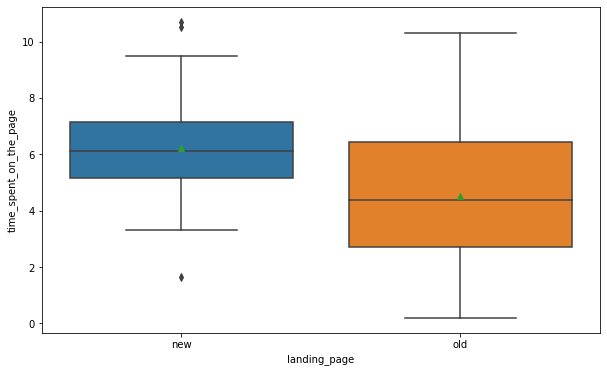

In [22]:
#Lets Analyse visually the time spent on the new and old page
plt.figure(figsize=(10,6))
sns.boxplot(x = 'landing_page', y = 'time_spent_on_the_page', showmeans =True, data = df)
plt.show()

#### Observation: 
From the visualisation we can see that people who have converted to the new page spend more time on the page than the ones that have not converted.

### Step 1: Define the null and alternate hypotheses

H0 = The users spend the same amount of time on the new landing page than the existing landing page.

Ha # The users spend more time on the new landing page than the existing landing page.

### Step 2: Select Appropriate test

The test to be used is the Two
independent
sample t-test

### Step 3: Decide the significance level

The significance level was given on the problem statement and it is alpha = 0.05

### Step 4: Collect and prepare data

In [23]:
# create subsetted data frame for new landing page users 
time_spent_on_new = df[df['landing_page'] == 'new']['time_spent_on_the_page']
# create subsetted data frame for old landing page users
time_spent_on_old = df[df['landing_page'] == 'old']['time_spent_on_the_page']

In [24]:
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_on_new.std(),2))
print('The sample standard deviation of the time spent on the new page is:', round(time_spent_on_old.std(),2))

The sample standard deviation of the time spent on the new page is: 1.82
The sample standard deviation of the time spent on the new page is: 2.58


### Step 5: Calculate the p-value

In [25]:
# complete the code to import the required function
from scipy.stats import ttest_ind

# write the code to calculate the p-value
test_stat, p_value = ttest_ind(time_spent_on_new, time_spent_on_old, alternative= 'greater')

print('The p-value is', p_value)

The p-value is 0.0001316123528095005


### Step 6: Compare the p-value with $\alpha$

In [26]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.0001316123528095005 is less than the level of significance, we reject the null hypothesis.


### Step 7:  Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis.Therefore the users spend more time on the new landing page than the old landing page. We can infer that converting to the new page make users stay on the page longer.

## 3. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page? (10 Marks)

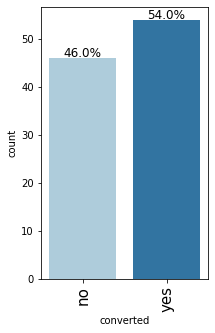

In [27]:
#Visualisation for converted
labeled_barplot(df,'converted', perc= True)

#### Observation: 
from this graph the conversion rate seem to be higher than those rate of the not converted.

# Step 1: Define the null and alternate hypotheses

Hnull = The conversion rate for the new page is the same as the conversion rate for the old page.

Halternative = The conversion rate for the new page is greater than the conversion rate for the old page.

# Step 2: Select the Appropriate test

the appropriate test is Two proportions
z-test

# Step 3: Decide the significance level

The significance level has been given on the problem which is alpha = 0.05

# Step 4: Collect and prepare the data

In [28]:
# calculate the number of converted users in the treatment group
new_converted = df[df['group'] == 'treatment']['converted'].value_counts()['yes']
# calculate the number of converted users in the control group
old_converted = df[df['group'] == 'control']['converted'].value_counts()['yes']

n_control = df.group.value_counts()['control'] # total number of users in the control group
n_treatment = df.group.value_counts()['treatment'] # total number of users in the treatment group
print('The numbers of users served the new and old pages are {0} and {1} respectively'.format(n_control, n_treatment ))

The numbers of users served the new and old pages are 50 and 50 respectively


In [29]:
print(new_converted)

33


In [30]:
print(old_converted)

21


In [31]:
print(f' The proportions of new users converted and old users converted are {round(33/50,2)}, {round(21/50,2)} respectively')

 The proportions of new users converted and old users converted are 0.66, 0.42 respectively


# Step 5: Calculate the p-value

In [32]:
# complete the code to import the required function
from statsmodels.stats.proportion import proportions_ztest  

# find the p-value using proportion_ztest
stat, p_value = proportions_ztest([new_converted, old_converted] , [n_treatment, n_control], alternative = 'larger')

# print the p-value
print('The p-value is '+ str(p_value))

The p-value is 0.008026308204056278


# Step 6: Compare the p-value with alpha

In [33]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.008026308204056278 is less than the level of significance, we reject the null hypothesis.


# Step 7: Draw inference

Since the p-value is less than the 5% significance level, we reject the null hypothesis. Therefore, we have enough statistical evidence to say that the conversion rate for new users is greater that the conversion rate for old users. We can infer that the new page is working positively as it has attracted more users than the old page.

## 4. Is the conversion and preferred language are independent or related? (10 Marks)

<AxesSubplot:xlabel='language_preferred', ylabel='Count'>

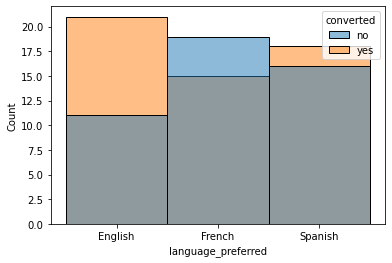

In [34]:
#Let's perform a visual analysis
sns.histplot(x="language_preferred",hue='converted', data=df)

#### Observation: 
The preferred English language have the most to convert to the new page, follow by the spanish preferred language. The french preferred language have the highest rate for users who have not converted. But this graph does not tell us if there is a pattern between languages and conversion rate.

## Step 1: Define the null and alternate hypothesis

Hnull = Conversion rate and language are independent.

Ha = Conversion rate and language are not independent.

## Step 2: Select Appropriate test

The appropriate test for this is Chi square Test for Independence

## Step 3: Decide the significance level

The level of significance was given in the problem statement as alpha = 0.05

## Step 4: Collect and prepare data

In [35]:
# create the contingency table showing the distribution of the two categorical variables
contingency_table = pd.crosstab(df['converted'],df['language_preferred'])
contingency_table

language_preferred,English,French,Spanish
converted,,,
no,11,19,16
yes,21,15,18


## Step 5: Calculate the p-value

In [36]:
# use chi2_contingency() to find the p-value
from scipy.stats import chi2_contingency
# use chi2_contingency() to find the p-value
chi2, pval, dof, exp_freq = chi2_contingency(contingency_table)
# print the p-value
print('The p-value is', pval)

The p-value is 0.21298887487543447


## Step 6: Compare the p-value with the level of significance

In [37]:
# print the conclusion based on p-value
if pval < 0.05:
    print(f'As the p-value {pval} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {pval} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.21298887487543447 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say that conversion rate and language are independent one from another. 

## 5. Is the time spent on the new page same for the different language users? (10 Marks)

In [38]:
# create a new DataFrame for users who got served the new page
df_new = df[df['landing_page'] == 'new']

In [39]:
df_new.head()

,user_id,group,landing_page,time_spent_on_the_page,converted,language_preferred
1,546468,treatment,new,7.13,yes,English
2,546462,treatment,new,4.40,no,Spanish
4,546459,treatment,new,4.75,yes,Spanish
6,546448,treatment,new,5.25,yes,French
8,546461,treatment,new,10.71,yes,French


In [40]:
df_new.shape

(50, 6)

In [41]:
English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'] 
French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'] 
Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page']

In [42]:
English.mean()

6.6637499999999985

In [43]:
French.mean()

6.196470588235294

In [44]:
Spanish.mean()

5.835294117647059

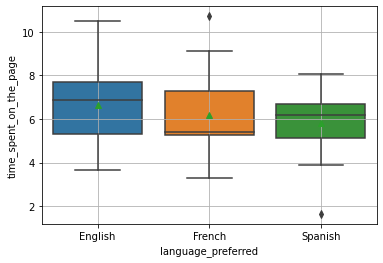

In [45]:
#Let's perform visual analysis
sns.boxplot(x="language_preferred", y="time_spent_on_the_page", showmeans=True, data = df_new)
plt.grid()
plt.show()

#### Observation: 
From this graph the average time spent on the new page is different from every languages.

## Step 1: Define the null and alternate hypothesis

Hnull = The time spent on the new page is different for the different language users.

Ha = The time spent on the new page is the same for the different language users.

## Step 2: Select Appropriate test

The apropriate test for this problem is One way Annova test. Now we have to check the assumptions of normality and equality of variance for the three groups.

### Shapiro-Wilk’s test for normal distribution
Hnull = Time spent on the new page follows a normal distribution.

Ha = Time spent on the new page does not follow a normal distribution.



In [46]:
#Normality
# import function
from scipy.stats import shapiro

# find the p-value
w, p_value = shapiro(df_new['time_spent_on_the_page']) 
print('The p-value is', p_value)

The p-value is 0.8040016293525696


P-value is greater than the level of significance here, therfore we fail to reject the null hypothesis that states that the time spent on new page follows a normal distribution.

### Levene’s test

Hnull = All the population variances are equal.

Ha = At least one variance is different from the rest.

In [47]:
#Homogeneity of Variance
#import the function
from scipy.stats import levene
statistic, p_value = levene( df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'], 
                             df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'])
# find the p-value
print('The p-value is', p_value)

The p-value is 0.46711357711340173


P-value is greater than the level of significance here, therfore we fail to reject the null hypothesis that states that All the population variances are equal 

Observation: We have normal distribution and homogeneity of variance.

## Step 3: Decide the significance level

The level of significance has been given in the problem statement as alpha = 0.05

## Step 4: Collect and prepare data

In [48]:
English = df_new[df_new['language_preferred']=="English"]['time_spent_on_the_page'] #time spent on new page by English users
French = df_new[df_new['language_preferred']=="French"]['time_spent_on_the_page'] #time spent on new page by French users
Spanish = df_new[df_new['language_preferred']=="Spanish"]['time_spent_on_the_page'] #time spent on new page by Spanish users

## Step 5: Calculate the p-value

In [49]:
# Let's import the required function
from scipy.stats import f_oneway 

# write the code to calculate the p-value
test_stat, p_value = f_oneway(English, French, Spanish)

print('The p-value is', p_value)

The p-value is 0.43204138694325955


## Step 6: Compare the p-value with alpha

In [50]:
# print the conclusion based on p-value
if p_value < 0.05:
    print(f'As the p-value {p_value} is less than the level of significance, we reject the null hypothesis.')
else:
    print(f'As the p-value {p_value} is greater than the level of significance, we fail to reject the null hypothesis.')

As the p-value 0.43204138694325955 is greater than the level of significance, we fail to reject the null hypothesis.


## Step 7: Draw inference

Since the p-value is greater than the 5% significance level, we fail to reject the null hypothesis. Therefore, we have enough statistical evidence to say that the average time spent on the new page is different for the different language users.

## Conclusion and Business Recommendations

After conducting several statistical tests to understand effectiveness of the new page, the data have shown some pattens that points us towards the effectiveness of the new page in gathering new users. Users spend more time on the new landing page compared to the old one, therefore it is evident that the new page has more features and attractiveness to hold the users there for a longer period. The conversion for the new users is high but could be better with addition of other features and finding ways to make all the users at least visit the new page. With a normal distribution and homogeneity of variance, the data clearly infers that the language preferred by users do not play a role in the conversion decision. English users seem to be the most frequent out of all users.

With the new features and taking in consideration all the metrics use by the users, it is safe to say that the new features have positive effects on attracting users. Adding other features, perhaps improving other features that were on the old page and adding them to the newer page could have a positive effect on the users that are still reluctant in converting to the new page. These changes would make the current users frequent on the page and eventually attract newer ones. English language users seems to be the most frequent on the pages, the company should start think of ways to attract more users from the other languages. The company should also consider including more language to have a wider audience.
